In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(r"C:\Users\Najwan\OneDrive\Desktop\Datasets\house.csv")
df = pd.DataFrame(data)
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722570
2,1,36.980709,692.09,111.224999,24,24,98112.519940
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [5]:

df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251437
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [6]:
df['net_sqm_per_bedroom'] = df['net_sqm']/df['bedroom_count']
df.drop(['bedroom_count'], axis = 1, inplace  = True)
df.head()

,net_sqm,center_distance,metro_distance,floor,age,price,net_sqm_per_bedroom
0,26.184098,1286.68,204.003817,22,67,96004.804557,26.184098
1,34.866901,1855.25,186.980360,8,30,92473.722570,34.866901
2,36.980709,692.09,111.224999,24,24,98112.519940,36.980709
3,17.445723,1399.49,237.998760,1,66,92118.326874,17.445723
4,52.587646,84.65,100.996400,20,3,98976.653176,52.587646


In [7]:
# df['net_sqm']  = df['net_sqm']/df['bedroom_count']
# df.head()

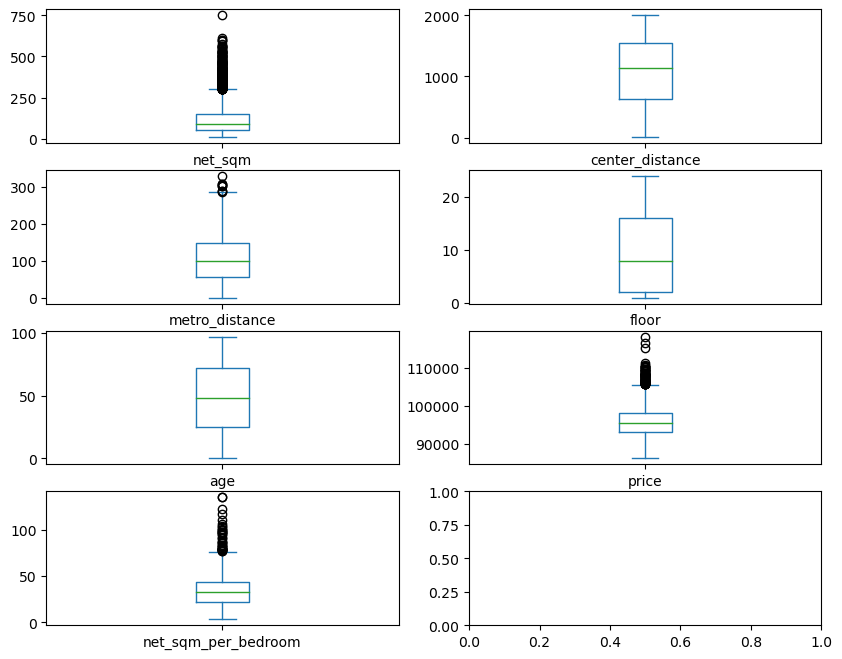

In [8]:
import math
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    
    df[df.columns[i]].plot(ax = axs[math.floor(i/2), j%2], kind = "box")
#     df.hist(column="bedroom_count")
plt.show()

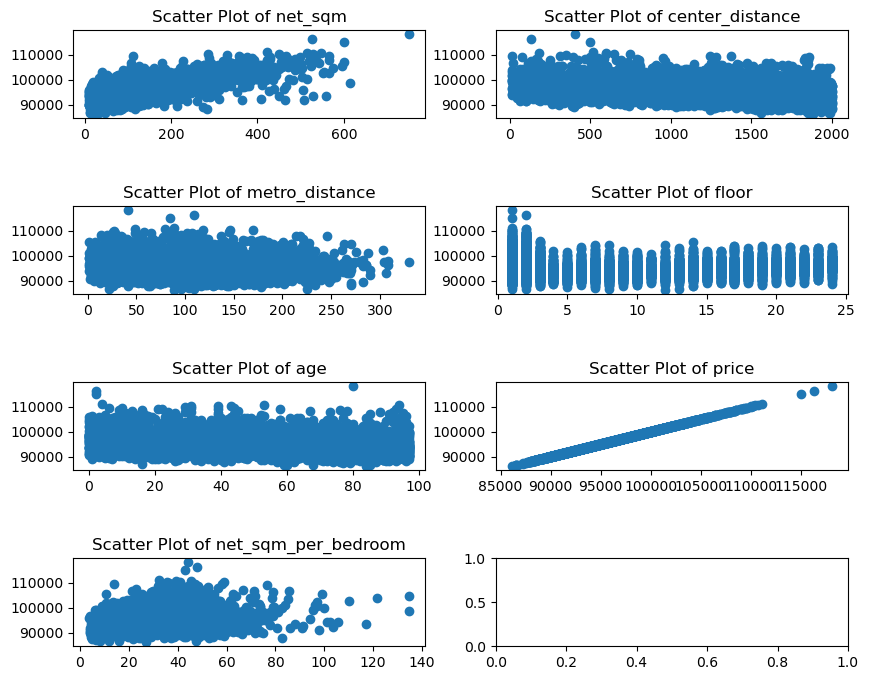

In [9]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    axs[math.floor(i/2), j%2].scatter(df[df.columns[i]], df.price, )
#     stats.probplot(df[df.columns[i]], dist="norm", plot=axs[math.floor(i/2), j%2])
    axs[math.floor(i/2), j%2].set_title(f'Scatter Plot of {df.columns[i]}')
# plt.title('Q-Q Plot')
plt.subplots_adjust(hspace=1)
plt.show()

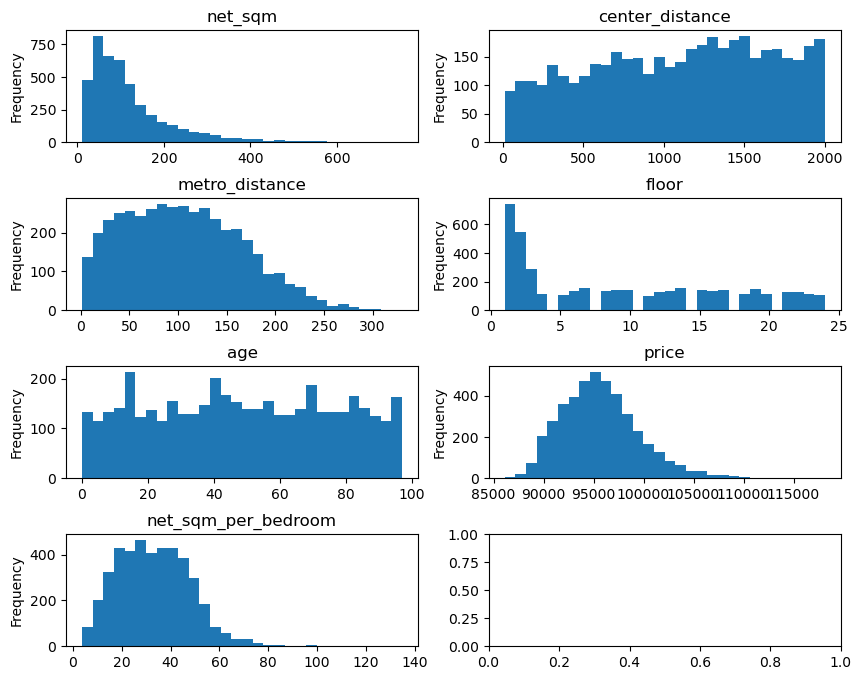

In [10]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    
    df[df.columns[i]].plot(ax = axs[math.floor(i/2), j%2], kind = "hist", bins = 30, title = df.columns[i])
    
plt.subplots_adjust(hspace=0.5)
plt.show()


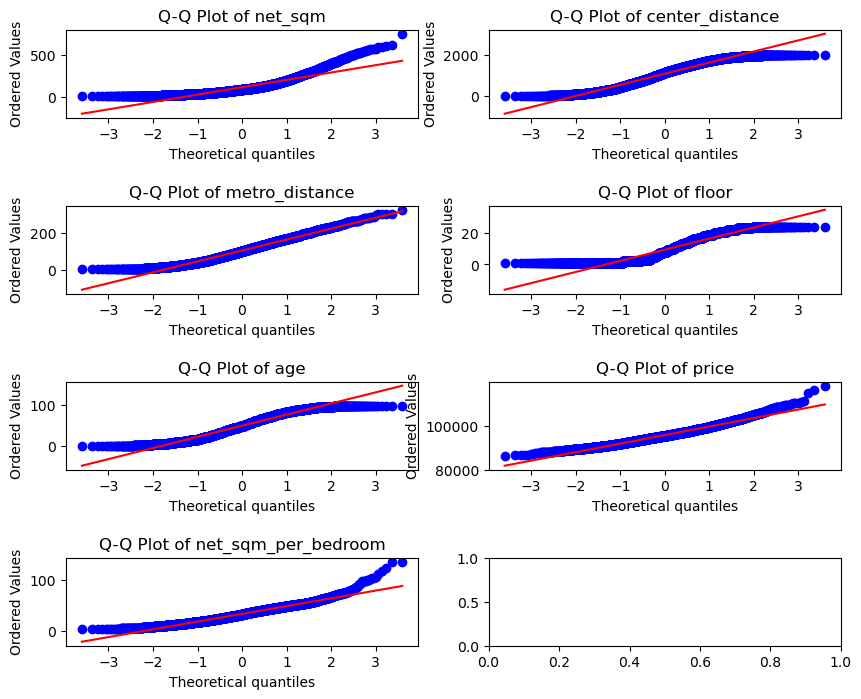

In [11]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    stats.probplot(df[df.columns[i]], dist="norm", plot=axs[math.floor(i/2), j%2])
    axs[math.floor(i/2), j%2].set_title(f'Q-Q Plot of {df.columns[i]}')
# plt.title('Q-Q Plot')
plt.subplots_adjust(hspace=1)
plt.show()

In [12]:
df.shape

(4308, 7)

In [13]:
# for i in df.columns:
#     df[i] = np.log(df[i]+1)
# df.head()

In [14]:
# fig, axs = plt.subplots(4,2, figsize=(10, 8))
# for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
#     axs[math.floor(i/2), j%2].scatter(df[df.columns[i]], df.price, )
# #     stats.probplot(df[df.columns[i]], dist="norm", plot=axs[math.floor(i/2), j%2])
#     axs[math.floor(i/2), j%2].set_title(f'Scatter Plot of {df.columns[i]}')
# # plt.title('Q-Q Plot')
# plt.subplots_adjust(hspace=1)
# plt.show()

In [15]:
Y = df[['price']]
Y.head()

,price
0,96004.804557
1,92473.722570
2,98112.519940
3,92118.326874
4,98976.653176


In [16]:
X = df.drop(['price'], axis = 1)
X.head()

,net_sqm,center_distance,metro_distance,floor,age,net_sqm_per_bedroom
0,26.184098,1286.68,204.003817,22,67,26.184098
1,34.866901,1855.25,186.980360,8,30,34.866901
2,36.980709,692.09,111.224999,24,24,36.980709
3,17.445723,1399.49,237.998760,1,66,17.445723
4,52.587646,84.65,100.996400,20,3,52.587646


In [17]:
X_tr, X_te, Y_tr,Y_te = train_test_split(X, Y, test_size = 0.3, random_state = 12)

In [18]:
X_tr.shape, Y_tr.shape

((3015, 6), (3015, 1))

In [19]:
X_tes,X_va, Y_tes, Y_va = train_test_split(X_te, Y_te, test_size = 0.5, random_state = 12)

In [20]:
X_tes.shape

(646, 6)

In [21]:
type(X_tr)

pandas.core.frame.DataFrame

In [22]:
X_tr.corr()

,net_sqm,center_distance,metro_distance,floor,age,net_sqm_per_bedroom
net_sqm,1.000000,-0.013392,0.024899,-0.403881,-0.049465,0.419277
center_distance,-0.013392,1.000000,0.591244,0.029656,-0.003751,-0.005978
metro_distance,0.024899,0.591244,1.000000,0.004458,-0.002798,-0.014993
floor,-0.403881,0.029656,0.004458,1.000000,0.014506,0.078406
age,-0.049465,-0.003751,-0.002798,0.014506,1.000000,-0.002151
net_sqm_per_bedroom,0.419277,-0.005978,-0.014993,0.078406,-0.002151,1.000000


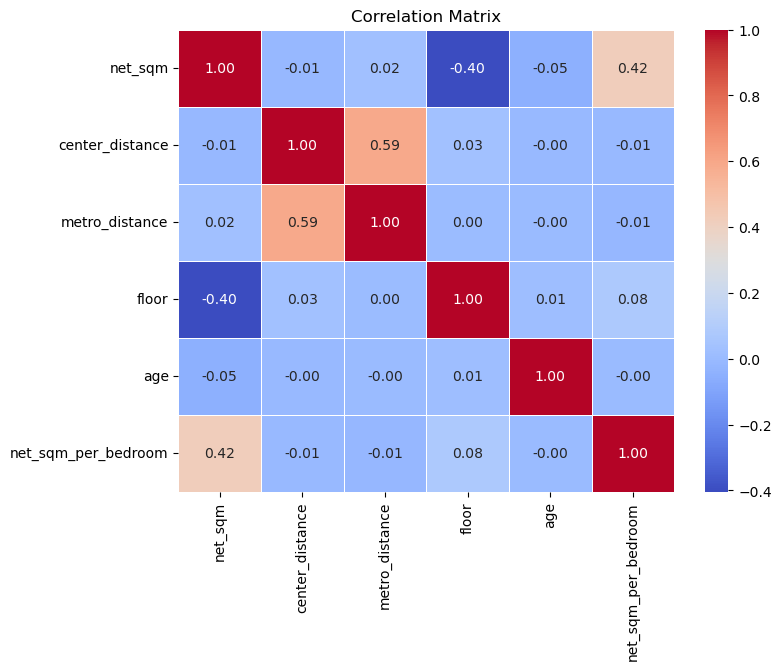

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(X_tr.corr(), cmap = "coolwarm", annot = True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [24]:
def dff(dataframe):
    return pd.DataFrame(dataframe)

In [25]:
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
dff(X_tr_s).head()

,0,1,2,3,4,5
0,-0.232115,0.457872,-0.005762,1.410941,-0.489096,1.001878
1,-0.342056,-0.808818,0.641845,0.614264,0.967576,-0.291336
2,-0.809273,0.780738,-1.103791,1.012603,0.931159,-0.810993
3,-0.252401,-0.774299,-0.160613,-1.111868,-0.998932,-1.405789
4,-0.561391,1.539356,0.293653,-0.182412,0.967576,-0.750627


In [26]:
pca = PCA(n_components=0.95)  # Keeps 95% of the variance
X_tr_pca = pca.fit_transform(X_tr_s)
dff(X_tr_pca).head()

,0,1,2,3,4,5
0,0.415457,-0.209281,1.647546,0.700651,-0.256554,0.098719
1,0.072238,-0.742075,0.314383,-0.872873,1.075618,-0.089232
2,0.179652,-1.573472,0.291333,-0.758260,-1.081761,0.833567
3,-0.585546,-0.424890,-1.880304,0.825271,0.366151,-0.159128
4,1.434400,-0.438849,-0.538704,-0.987652,-0.858670,0.225526


In [27]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_tr_pca, Y_tr)

LinearRegression()

In [28]:
X_te_s = scaler.transform(X_te)
X_te_s

array([[-0.781615  ,  1.17690034,  2.23823674,  0.21592617, -1.5816004 ,
         0.73887117],
       [-0.88655194,  0.49621619, -0.07948508,  0.87982318,  1.04040929,
        -1.4315196 ],
       [-1.08287542, -0.51644651, -1.08049427,  0.34870557, -0.67118037,
        -1.67038406],
       ...,
       [ 0.35553198,  1.55590227,  1.27967399,  1.14538198, -1.29026599,
         1.16942627],
       [-0.80152192, -0.32183902, -0.49475266,  0.48148498,  0.20282286,
        -0.78664522],
       [-0.28748734,  1.61416723,  1.20083697,  0.87982318, -1.03534838,
        -0.17706766]])

In [29]:
X_te_pca = pca.transform(X_te_s)
dff(X_te_pca)

,0,1,2,3,4,5
0,2.384716,0.455699,0.444590,1.596851,0.426070,-1.129635
1,0.755083,-1.718937,-0.252843,-0.905556,-0.150722,0.716056
2,-0.649828,-1.957325,-0.967460,0.735214,-0.257049,0.416026
3,1.040639,1.087955,1.709977,-0.646024,0.101776,-0.110406
4,1.710484,-1.338934,-0.303950,0.947893,0.598226,0.582084
...,...,...,...,...,...,...
1288,-0.148583,-0.823106,-0.277819,1.148094,-0.424487,-0.022955
1289,0.480679,-0.791703,0.702884,1.488002,-0.294377,1.014759
1290,1.876194,0.901327,1.463739,1.419471,-0.109126,0.164966
1291,-0.250523,-1.322687,-0.174669,-0.114385,-0.052480,0.154801


In [30]:
ytrpred = mlr.predict(X_tr_pca)
ypred = mlr.predict(X_te_pca)
dff(ypred).head()

,0
0,93092.440975
1,92386.409410
2,94151.757296
3,95888.180360
4,94499.647046


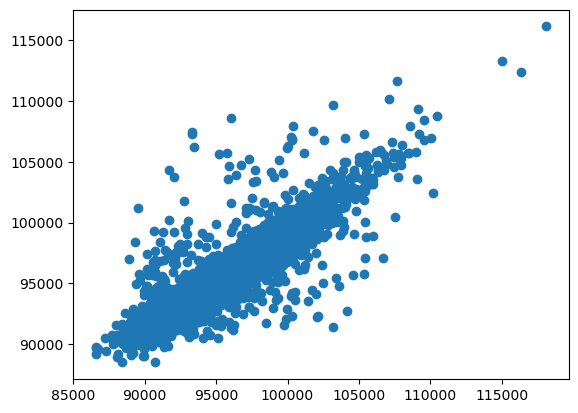

In [31]:
plt.scatter(Y_tr, ytrpred)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse_tr = mean_squared_error(Y_tr, ytrpred)
mse_te = mean_squared_error(Y_te, ypred)
print(f"mean squared error for training set is : {mse_tr:.2f} and for test set :{mse_te:.2f}")

mean squared error for training set is : 4305130.88 and for test set :4831807.61


In [33]:
r2_te = r2_score(Y_te, ypred)
r2_te

0.6743735118935048

In [34]:
vif = 1/(1-r2_te)
vif

3.0710032399850498

In [35]:
X_va_s = scaler.transform(X_va)
dff(X_va_s).head()

,0,1,2,3,4,5
0,1.714665,-1.742266,-0.216001,-1.111868,1.695912,1.534443
1,0.330044,0.225696,0.058806,0.879823,-0.015678,0.290265
2,0.060281,0.136107,0.398442,0.747044,0.348490,0.551166
3,-0.018282,0.396522,-0.308226,-0.846309,1.295327,0.386653
4,-0.524635,1.107556,0.835248,-0.580750,1.695912,0.083064


In [36]:
X_va_pca = pca.transform(X_va_s)
dff(X_va_pca).head()

,0,1,2,3,4,5
0,-1.971321,1.976542,0.459029,-1.850094,0.935480,-0.433126
1,0.224202,0.026679,0.823985,0.129381,0.080661,0.518400
2,0.392159,0.040778,0.942266,-0.240758,0.243188,0.061616
3,-0.087285,0.451298,-0.174644,-1.388766,-0.689934,-0.386922
4,1.345824,0.136882,-0.177558,-1.756263,-0.411247,-0.552050


In [37]:
ypred_va = mlr.predict(X_va_pca)
dff(ypred_va).head()

,0
0,101707.525853
1,96970.315916
2,95999.267679
3,93037.435086
4,90622.384145


In [38]:
mse_va = mean_squared_error(Y_va, ypred_va)
mse_va

4656275.023797038

In [39]:
r2_va = r2_score(Y_va, ypred_va)
print(f"R2 value in validation set is {r2_va:.4f}")

R2 value in validation set is 0.6634


In [40]:
vif_va = 1/(1-r2_va)
vif_va

2.9711485554890626

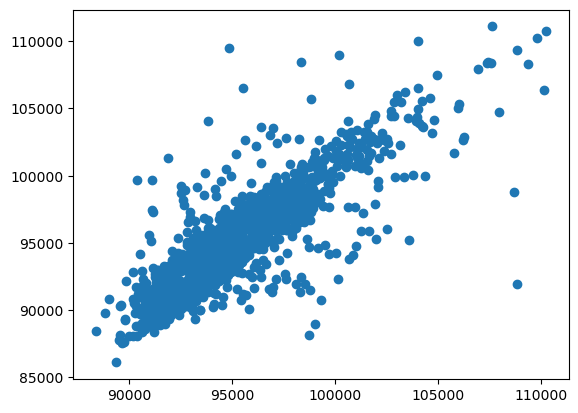

In [41]:
# plt.plot(dff(ypred), color = 'red')
# plt.plot(dff(Y_te), color = 'blue')
plt.scatter(ypred, Y_te)
plt.show()

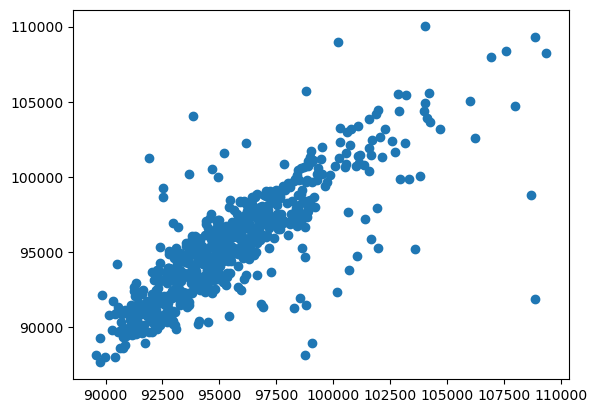

In [42]:
plt.scatter(ypred_va, Y_va)
plt.show()

Even though the model performs well still need a improvement

In [43]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
param = {'alpha':[0.001,0.01,0.1,1,10,100]}
lasso_grid = GridSearchCV(Lasso(), param, cv=5)
lasso_grid.fit(X_tr_pca, Y_tr)
best_alpha = lasso_grid.best_params_['alpha']
print(best_alpha)

1


In [45]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_tr_pca, Y_tr)
ypred_l = lasso.predict(X_te_pca)
mse_l = mean_squared_error(Y_te,ypred_l)
r2_l = r2_score(Y_te, ypred_l)
print(f"mse value is {mse_l}, r2 value is {r2_l:.4f}")

mse value is 4831194.652237912, r2 value is 0.6744


In [46]:
ypred_va_l = lasso.predict(X_va_pca)
mse_ll = mean_squared_error(Y_va,ypred_va_l)
r2_ll = r2_score(Y_va, ypred_va_l)
print(f"mse value is {mse_ll}, r2 value is {r2_ll:.4f}")

mse value is 4655087.671723479, r2 value is 0.6635


There is no any improvement using lasso regularization

In [47]:
param = {'alpha':[0.001,0.01,0.1,1,10,100]}
ridge_grid = GridSearchCV(Ridge(), param, cv=5)
ridge_grid.fit(X_tr_pca, Y_tr)
best_alpha_r = ridge_grid.best_params_['alpha']
print(best_alpha_r)

10


In [48]:
ridge = Ridge(alpha = best_alpha_r)
ridge.fit(X_tr_pca, Y_tr)
ypred_l_r = ridge.predict(X_te_pca)
mse_l_r = mean_squared_error(Y_te,ypred_l_r)
r2_l_r = r2_score(Y_te, ypred_l_r)
print(f"mse value is {mse_l_r}, r2 value is {r2_l_r:.4f}")

mse value is 4827680.334259195, r2 value is 0.6747


In [49]:
ypred_va_l_r = ridge.predict(X_va_pca)
mse_ll_r = mean_squared_error(Y_va,ypred_va_l_r)
r2_ll_r = r2_score(Y_va, ypred_va_l_r)
print(f"mse value is {mse_ll_r}, r2 value is {r2_ll_r:.4f}")

mse value is 4648728.130264012, r2 value is 0.6640


In [50]:
# !pip install joblib
import joblib

# Assuming 'model' is your trained model
save_path_model = r"C:\Users\Najwan\OneDrive\Documents\GitHub\ML-Projects\mlr.pkl"
save_path_scaler = r"C:\Users\Najwan\OneDrive\Documents\GitHub\ML-Projects\scaler.pkl"
save_path_pca = r"C:\Users\Najwan\OneDrive\Documents\GitHub\ML-Projects\pca.pkl"
# with open(save_path, "wb") as file:
#     joblib.dump(mlr, 'mlr.pkl')
joblib.dump(mlr, save_path_model)
joblib.dump(scaler, save_path_scaler)
joblib.dump(pca, save_path_pca)

['C:\\Users\\Najwan\\OneDrive\\Documents\\GitHub\\ML-Projects\\pca.pkl']

In the validation set only a 0.002 improvement so there is no need of regularization or polynomial features the main cause of the low r2 value is there is no enough data

In [51]:
import os
os.getcwd()


'C:\\Users\\Najwan\\Housing_Price_ML'

In [52]:
mlr.coef_

array([[-1408.38268564,  1527.17453102,   238.87569856,   719.67269341,
         2436.55495205,  2000.75300563]])

In [53]:
mlr.intercept_

array([95721.66604485])